### Recipe recommender based on similar ingredients

## Data Analysis

In [1]:
import pandas as pd
import nltk

In [3]:
recipe_ingredients = pd.read_csv('./data/raw-data_recipe.csv')
recipe_ingredients = recipe_ingredients.drop(columns=["image_url", "cooking_directions", "reviews", "nutritions"])
recipe_ingredients.aver_rate = recipe_ingredients.aver_rate.apply(lambda num: f'{num:.2f}')
recipe_ingredients.head()

,recipe_id,recipe_name,aver_rate,review_nums,ingredients
0,222388,Homemade Bacon,5.00,3,pork belly^smoked paprika^kosher salt^ground b...
1,240488,"Pork Loin, Apples, and Sauerkraut",4.76,29,sauerkraut drained^Granny Smith apples sliced^...
2,218939,Foolproof Rosemary Chicken Wings,4.57,12,chicken wings^sprigs rosemary^head garlic^oliv...
3,87211,Chicken Pesto Paninis,4.62,163,focaccia bread quartered^prepared basil pesto^...
4,245714,Potato Bacon Pizza,4.50,2,red potatoes^strips bacon^Sauce:^heavy whippin...


In [4]:
recipe_ingredients["ingredients_together"] = recipe_ingredients["ingredients"].apply(lambda x: " ".join(x.split("^")))

In [5]:
recipe_ingredients["ingredients_together"] = recipe_ingredients["ingredients_together"].apply(lambda x: x.lower())

In [6]:
recipe_ingredients["ingredients_together"].head()

0    pork belly smoked paprika kosher salt ground b...
1    sauerkraut drained granny smith apples sliced ...
2    chicken wings sprigs rosemary head garlic oliv...
3    focaccia bread quartered prepared basil pesto ...
4    red potatoes strips bacon sauce: heavy whippin...
Name: ingredients_together, dtype: object

### Cleaning our ingredients

In [7]:
import string
"""Punctuation Removal"""
def remove_punctuations(text):
    for char in string.punctuation:
        text = text.replace(char, '')
    return text

In [8]:
recipe_ingredients["ingredients_together"] = recipe_ingredients["ingredients_together"].apply(remove_punctuations)

### Stop words

In [9]:
stopwords = nltk.corpus.stopwords.words("english")

In [10]:
recipe_ingredients["ingredients_nostopw"] = recipe_ingredients["ingredients_together"].apply(lambda x: " ".join([word for word in x.split() if word not in stopwords]))

In [11]:
vocabulary1 = nltk.FreqDist()

for ingredients in recipe_ingredients["ingredients_nostopw"]:
    ingredients = ingredients.split()
    vocabulary1.update(ingredients)

for word, frequency in vocabulary1.most_common(30):
    print(f'{word}:\t{frequency}')

ground:	28284
salt:	28149
pepper:	27440
chopped:	23215
sugar:	22887
white:	19431
oil:	17987
butter:	17232
fresh:	16349
cheese:	16325
garlic:	15230
onion:	14682
flour:	14165
black:	13727
powder:	12424
water:	11608
taste:	11349
allpurpose:	10984
cream:	10895
sauce:	10553
milk:	10307
chicken:	9639
olive:	9170
dried:	8760
eggs:	8734
red:	8519
green:	8225
baking:	8141
vanilla:	7962
juice:	7833


From here we can choose which words we consider irrelevant for ingredients such as:
 * salt
 * fresh
 * dried
 * green
 * black
 * taste
 * ...

In [12]:
print(vocabulary1.most_common(10))

[('ground', 28284), ('salt', 28149), ('pepper', 27440), ('chopped', 23215), ('sugar', 22887), ('white', 19431), ('oil', 17987), ('butter', 17232), ('fresh', 16349), ('cheese', 16325)]


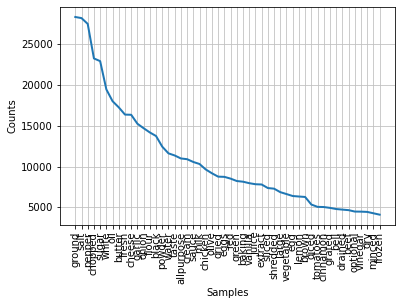

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
vocabulary1.plot(50)

In [45]:
from prettytable import PrettyTable
data = PrettyTable(["Ingredient", "Count"])
for i in vocabulary1.most_common(600):
    data.add_row(i)
with open("first_vocab.txt", 'w') as f:
    f.write(data.get_string())

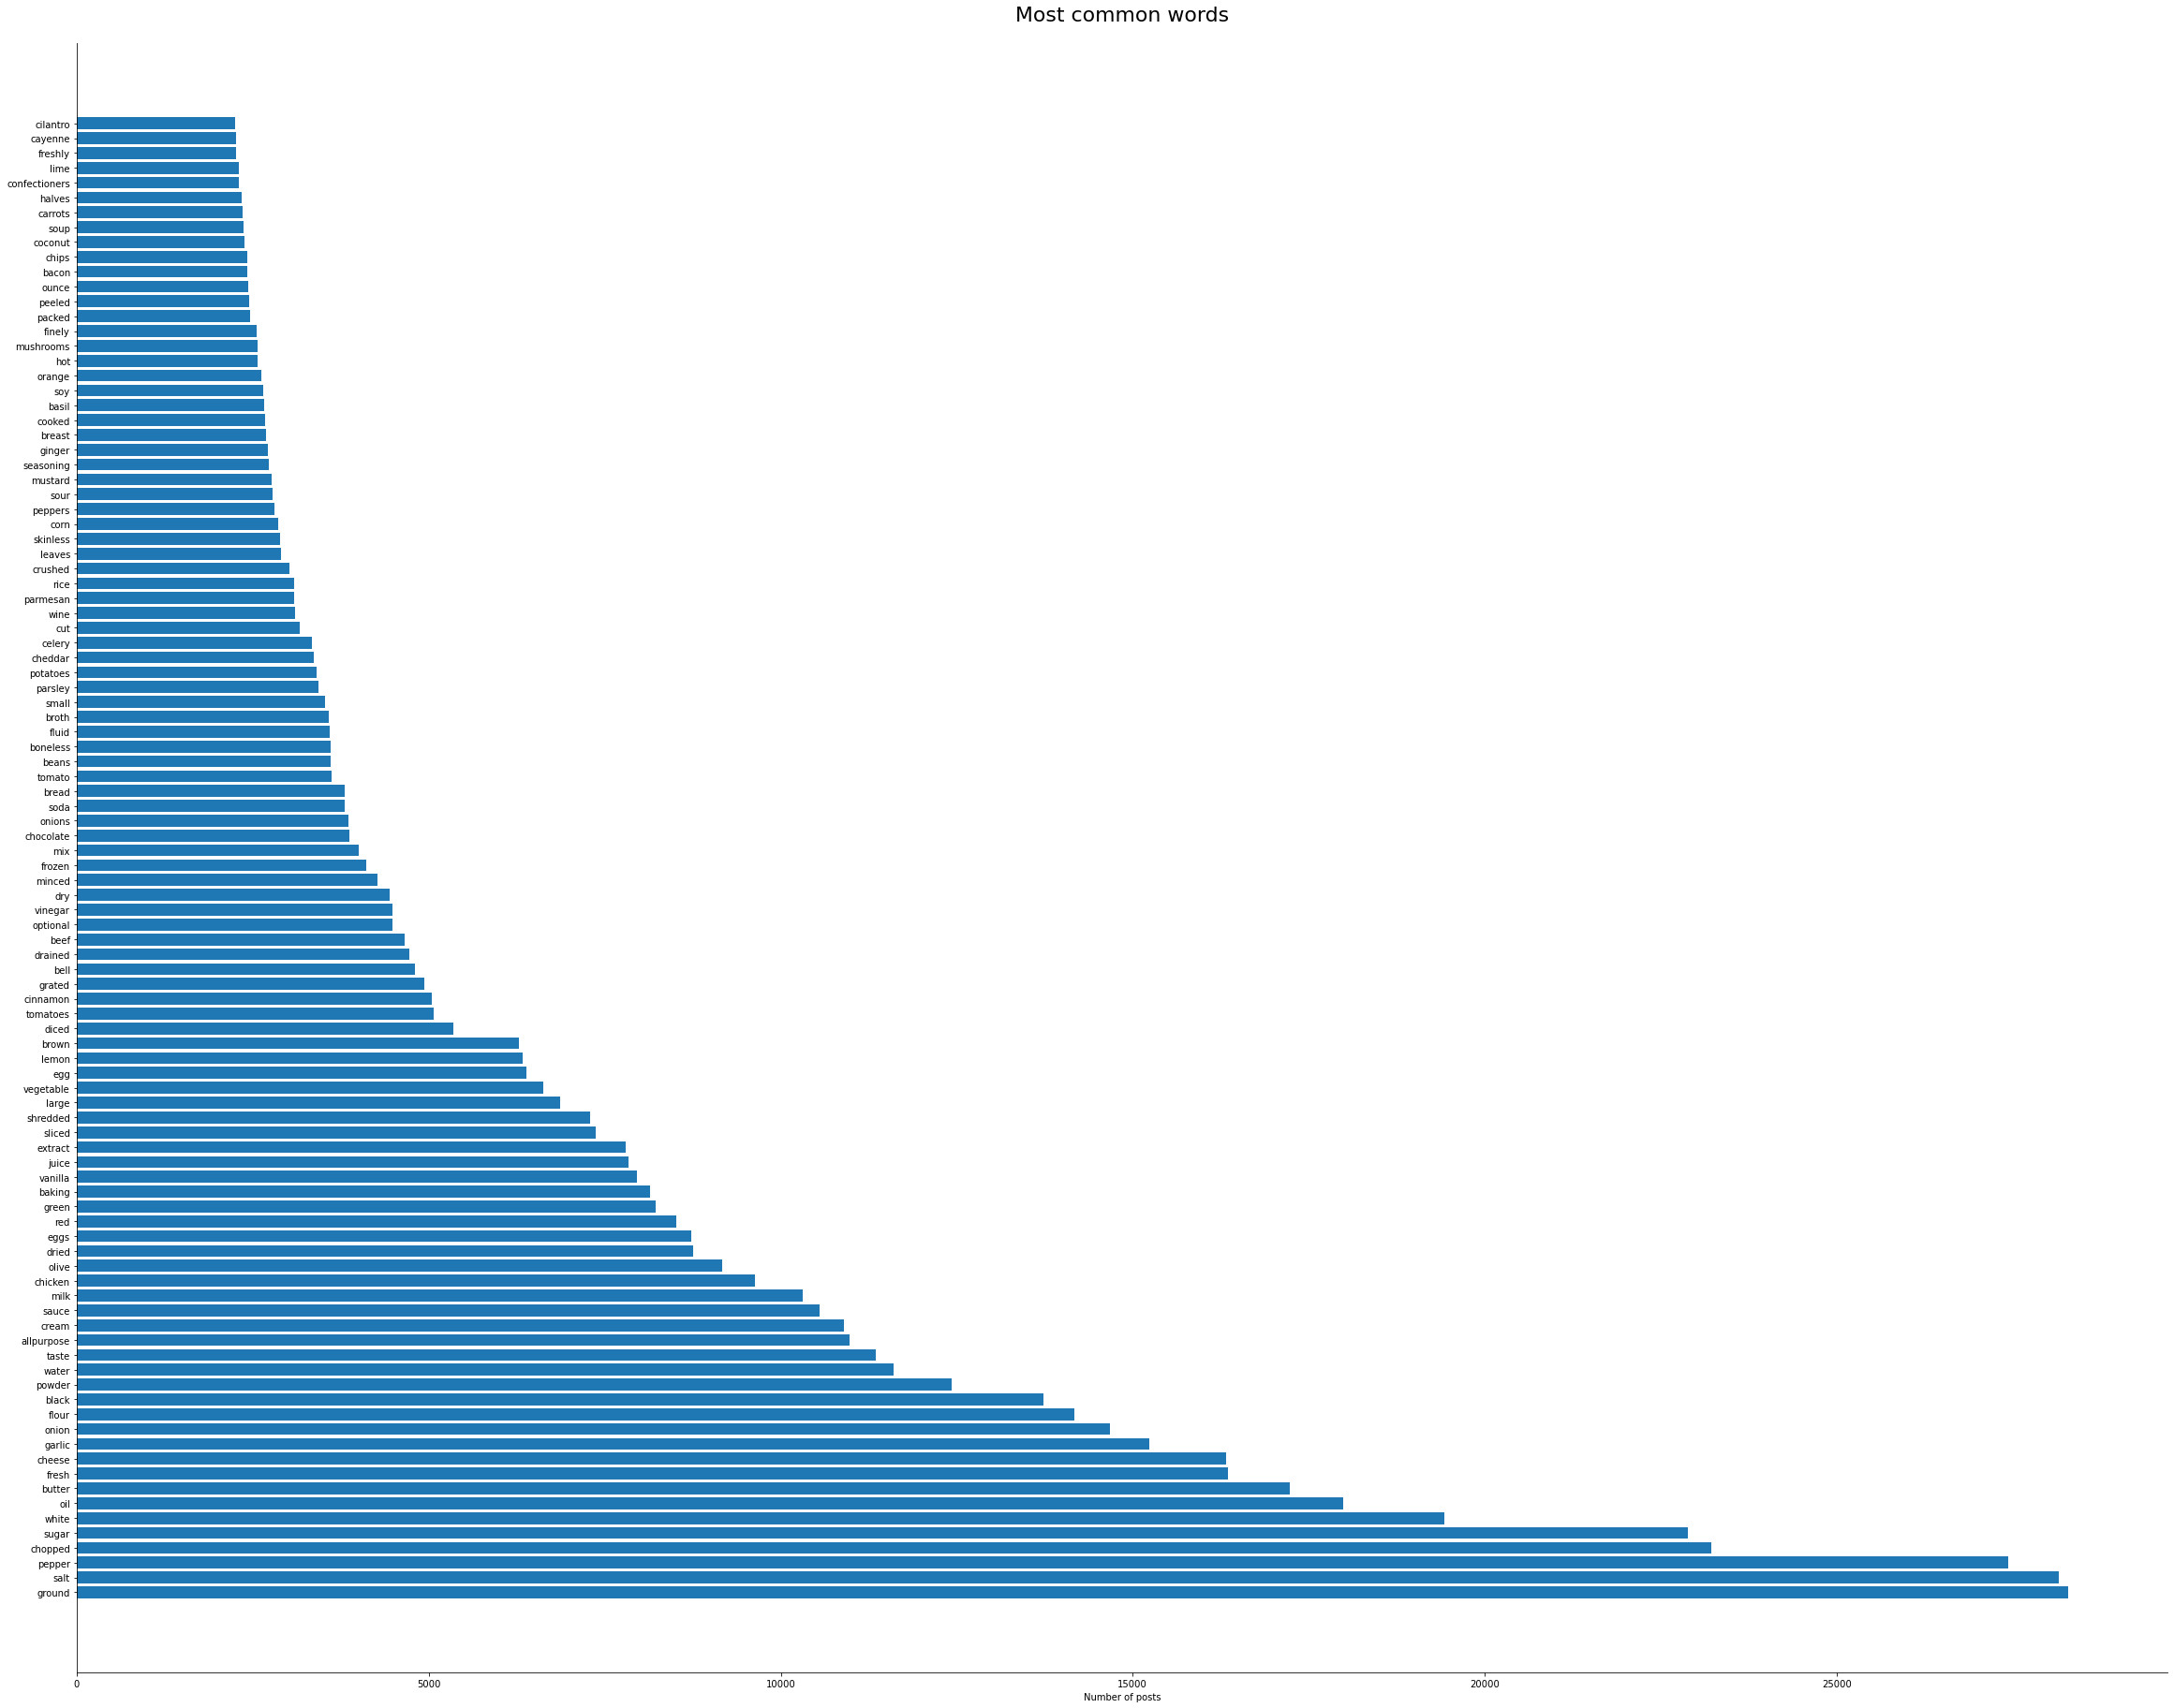

In [39]:
import matplotlib.pyplot as plt

# create a plot:
fig, ax = plt.subplots(figsize=(40,32))
plt.barh([x[0] for x in vocabulary1.most_common(100)],[x[1] for x in vocabulary1.most_common(100)], label='Frequency')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Number of posts')
plt.title('Most common words',fontsize=22,pad=24)
plt.show()